In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy import stats

In [2]:
df = pd.read_csv('source/raw_vol2.0.csv')

In [3]:
df.groupby('ORD')['weight_gain'].mean().sort_values()

ORD
1    -0.333461
4    -0.217850
3    -0.172268
2    -0.122652
5    -0.054636
7     0.046346
6     0.082662
13    0.121951
8     0.155720
12    0.239731
9     0.251449
10    0.507955
11    0.568370
14    0.708520
Name: weight_gain, dtype: float64

In [4]:
winner = df[df['ORD'] == 1]

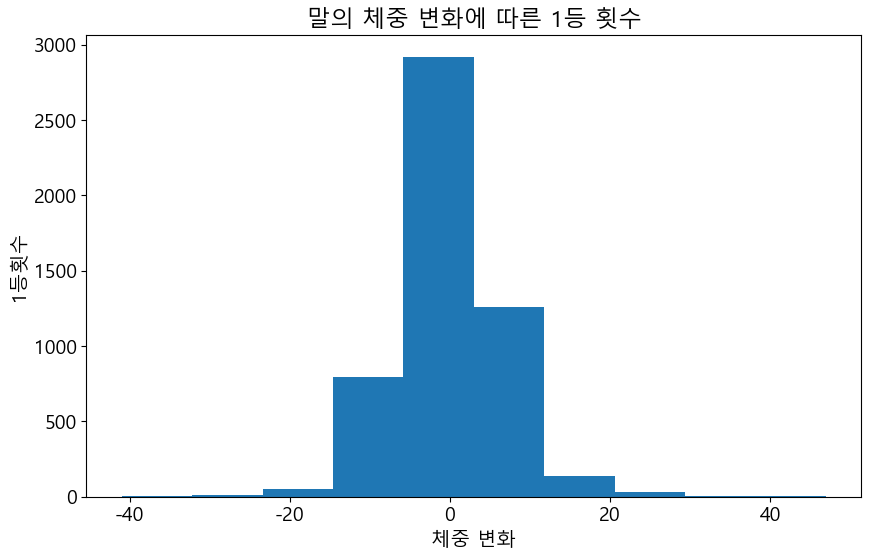

In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
# 1등한 횟수를 'weight_gain' 기준으로 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(winner['weight_gain'].dropna(), bins=10)  # NaN 값을 제거하고 bin 크기 설정
plt.xlabel('체중 변화')
plt.ylabel('1등횟수')
plt.title('말의 체중 변화에 따른 1등 횟수')
plt.show()

In [22]:
#체중의 변화가 없는 말이 1등할 확률이 높을 것이다.
# 데이터 불러오기
file_path = 'source/raw_vol2.0.csv'
df = pd.read_csv(file_path)
indices = list(range(-10, 10)) 
# weight_gain을 기준으로 범주화 (예시)
df['WGC'] = pd.cut(df['weight_gain'], bins=indices)

# 카이제곱 검정을 위한 교차표 생성
contingency_table = pd.crosstab(df['ORD'], df['WGC'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square test statistic: 336.3126395505902
p-value: 1.3025888256928841e-05
Degrees of freedom: 234
Expected frequencies: [[ 89.17443044 120.75504143 142.25673402 186.603975   245.06170173
  287.48914872 336.25191585 405.07653008 400.46902453 415.34742788
  379.06332163 374.64779548 297.95202592 248.90128969 204.74602812
  166.35014849 131.02593923 107.22049386  83.60702789]
 [ 89.67606073 121.4343212  143.05696663 187.65367282 246.44024008
  289.10635293 338.14342381 407.35519512 402.7217711  417.68386949
  381.19565533 376.75529065 299.62808664 250.30142676 205.8977799
  167.28591307 131.76299558 107.82363814  84.07734003]
 [ 90.79508214 122.9496376  144.84210089 189.99530643 249.51544101
  292.71396233 342.36294158 412.43837096 407.74712882 422.89593155
  385.95239974 381.45662603 303.36699134 253.42480945 208.46707233
  169.37338788 133.40719819 109.16911383  85.12649789]
 [ 89.83040851 121.64333036 143.30319204 187.97665677 246.86440572
  289.60395423 338.72542626 408.05632282 40

In [23]:
#체중변화가 많은애들의 성적이 낮다.
contingency_table

WGC,"(-10, -9]","(-9, -8]","(-8, -7]","(-7, -6]","(-6, -5]","(-5, -4]","(-4, -3]","(-3, -2]","(-2, -1]","(-1, 0]","(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]","(7, 8]","(8, 9]"
ORD,,,,,,,,,,,,,,,,,,,
1,79,125,146,210,300,331,334,397,393,383,380,402,274,244,165,155,102,113,89
2,99,116,140,184,226,318,344,421,433,439,392,346,275,266,198,160,116,99,76
3,105,129,138,199,223,288,322,454,447,429,377,373,309,251,203,166,110,101,82
4,91,104,147,171,261,295,339,415,387,424,409,395,296,272,193,180,121,95,61
5,83,112,132,202,222,288,344,402,407,422,408,388,298,225,199,164,140,114,72
6,65,107,154,177,254,301,360,420,411,394,404,400,284,239,201,168,132,92,84
7,84,132,131,176,237,275,355,390,405,439,368,350,318,254,204,160,138,92,84
8,83,105,140,176,244,259,346,391,354,445,363,363,286,239,219,165,136,88,93
9,81,121,131,154,226,228,279,358,364,359,315,324,315,215,221,152,123,115,76


In [8]:
df2 = df['AGE'].sort_values()
df2.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [9]:
#체중의 변화가 없는 말이 1등할 확률이 높을 것이다.
# 데이터 불러오기
file_path = 'source/raw_vol2.0.csv'
df = pd.read_csv(file_path)

# weight_gain을 기준으로 범주화 (예시)
df['AC'] = pd.cut(df['AGE'], bins=[1, 2,  3,  4,  5,  6,  7,  8,  9, 10])

# 카이제곱 검정을 위한 교차표 생성
contingency_table = pd.crosstab(df['ORD'], df['AC'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square test statistic: 1395.145659149454
p-value: 8.190511555092293e-225
Degrees of freedom: 104
Expected frequencies: [[3.66367099e+02 1.72658613e+03 1.44120947e+03 8.22893358e+02
  4.08485944e+02 2.09448135e+02 1.12412428e+02 6.05518093e+01
  3.30456246e+01]
 [3.65518536e+02 1.72258709e+03 1.43787140e+03 8.20987409e+02
  4.07539827e+02 2.08963021e+02 1.12152064e+02 6.04115619e+01
  3.29690858e+01]
 [3.64669973e+02 1.71858805e+03 1.43453334e+03 8.19081461e+02
  4.06593710e+02 2.08477907e+02 1.11891699e+02 6.02713145e+01
  3.28925471e+01]
 [3.65094254e+02 1.72058757e+03 1.43620237e+03 8.20034435e+02
  4.07066769e+02 2.08720464e+02 1.12021881e+02 6.03414382e+01
  3.29308165e+01]
 [3.64387118e+02 1.71725504e+03 1.43342065e+03 8.18446144e+02
  4.06278338e+02 2.08316202e+02 1.11804911e+02 6.02245654e+01
  3.28670341e+01]
 [3.65730676e+02 1.72358685e+03 1.43870592e+03 8.21463897e+02
  4.07776356e+02 2.09084300e+02 1.12217155e+02 6.04466238e+01
  3.29882205e+01]
 [3.63821409e+02 1.714589

In [10]:
contingency_table

AC,"(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]","(7, 8]","(8, 9]","(9, 10]"
ORD,,,,,,,,,
1,591,2349,1336,505,199,96,53,33,19
2,435,2040,1429,662,289,159,78,50,27
3,372,1852,1472,790,325,170,98,47,31
4,351,1746,1446,834,388,198,119,44,37
5,354,1672,1457,837,385,215,121,67,45
6,312,1595,1467,857,476,234,137,60,34
7,310,1513,1492,879,471,241,135,75,29
8,312,1521,1377,917,477,253,126,70,30
9,279,1350,1341,854,472,251,133,79,30


In [11]:
df = pd.read_csv('source/raw_vol2.0.csv')

In [12]:
df2 = df[df['ORD'] == 1]

df3 = df2.groupby('AGE')['ORD'].count()

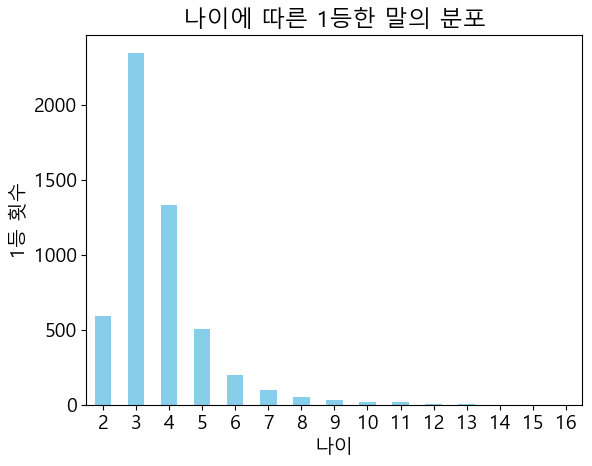

In [13]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 14

df3.plot(kind='bar', color='skyblue')
plt.title('나이에 따른 1등한 말의 분포')
plt.xlabel('나이')
plt.ylabel('1등 횟수')
plt.xticks(rotation=0)
plt.show()

In [14]:
#체중의 변화가 없는 말이 1등할 확률이 높을 것이다.
# 데이터 불러오기
file_path = 'source/raw_vol2.0.csv'
df = pd.read_csv(file_path)

# weight_gain을 기준으로 범주화 (예시)

# 카이제곱 검정을 위한 교차표 생성
contingency_table = pd.crosstab(df['ORD'], df['SEX'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square test statistic: 290.1535294084777
p-value: 1.9498677734854782e-46
Degrees of freedom: 26
Expected frequencies: [[1767.4172131  1432.12707081 2015.45571609]
 [1768.433944   1432.95092148 2016.61513452]
 [1764.7059307  1429.93013571 2012.36393359]
 [1765.7226616  1430.75398637 2013.52335202]
 [1761.655738   1427.45858372 2008.88567828]
 [1767.0783028  1431.85245393 2015.06924327]
 [1762.3335586  1428.00781749 2009.6586239 ]
 [1738.94874792 1409.05925222 1982.99199985]
 [1637.6145683  1326.94880272 1867.43662898]
 [1448.50262105 1173.71257923 1651.78479972]
 [ 696.46066595  564.3377048   794.20162925]
 [ 503.2817951   407.80607865  573.91212625]
 [  97.26725602   78.81504685  110.91769713]
 [  75.57699684   61.23956602   86.18343714]]


In [15]:
contingency_table

SEX,거,수,암
ORD,,,
1,1611,1739,1865
2,1679,1670,1869
3,1750,1454,2003
4,1777,1444,1989
5,1770,1450,1978
6,1810,1359,2045
7,1793,1330,2077
8,1831,1252,2048
9,1761,1203,1868
